In [385]:
import pandas as pd
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("darkgrid")

In [386]:
os.chdir ('/Users/ozlemalbayrak/Downloads/SPICED/EXERCISES/week8')

In [387]:
# STEP 1: Getting data
df_m=pd.read_csv('monday.csv', sep=';', index_col=0, parse_dates='True')
df_t=pd.read_csv('tuesday.csv', sep=';', index_col=0, parse_dates=True)
df_w=pd.read_csv('wednesday.csv', sep=';', index_col=0, parse_dates=True)
df_tr=pd.read_csv('thursday.csv', sep=';', index_col=0, parse_dates=True)
df_f=pd.read_csv('friday.csv', sep=';', index_col=0, parse_dates=True)

TypeError: Only booleans, lists, and dictionaries are accepted for the 'parse_dates' parameter

In [ ]:
#df=pd.concat([df_m, df_t, df_w, df_tr, df_f], axis=1, ignore_index=True)

In [ ]:
#Processing data: create uniqe customer ids for each day
df_m['cus_id']=	'M-' + df_m['customer_no'].astype(str)
df_t['cus_id']=	'T-' + df_t['customer_no'].astype(str)
df_w['cus_id']=	'W-' + df_w['customer_no'].astype(str)
df_tr['cus_id']=	'TR-' + df_tr['customer_no'].astype(str)
df_f['cus_id']=	'F-' + df_f['customer_no'].astype(str)

In [ ]:
#Processing data: create day column before appending days
df_m['day']='monday'
df_t['day']='tuesday'
df_w['day']='wednesday'
df_tr['day']='thursday'
df_f['day']='friday'

In [ ]:
#len(df)
#df['location'].value_counts()
#df.describe()

In [ ]:
#df.agg(
#    ["median","mean","std"]
#)

In [ ]:
# Appending: 
df=df_m.append(df_t)
df=df.append(df_w)
df=df.append(df_tr)
df=df.append(df_f)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   cus_id       24877 non-null  object
 3   day          24877 non-null  object
 4   hour         24877 non-null  int64 
 5   min          24877 non-null  int64 
 6   tot_cus      24877 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.0+ MB


Index(['customer_no', 'location', 'cus_id', 'day', 'hour', 'min', 'tot_cus'], dtype='object')

In [ ]:
df['day'].value_counts()

friday       5125
thursday     5104
wednesday    5050
monday       4884
tuesday      4714
Name: day, dtype: int64

In [ ]:

#2-Calculate the total number of customers in each section over time
# hours = df.index.hour
# df=pd.concat([df, pd.DataFrame(hours, index=df.index)], axis = 1)
# df['hour']=df['timestamp']
df['hour']=df.index.hour
df




,customer_no,location,cus_id,day,hour,min,tot_cus
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3,895
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3,895
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4,895
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4,895
2019-09-02 07:04:00,5,spices,M-5,monday,7,4,750
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50,932
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50,1502
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50,1502


In [ ]:
df= df.drop('timestamp', axis=1)

In [ ]:
min = df.index.minute
df=pd.concat([df, pd.DataFrame(min, index=df.index)], axis = 1)
df['min']=df['timestamp']


In [ ]:
df= df.drop('timestamp', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   cus_id       24877 non-null  object
 3   day          24877 non-null  object
 4   hour         24877 non-null  int64 
 5   min          24877 non-null  int64 
 6   tot_cus      24877 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.0+ MB


In [ ]:
#1: Total number of customer in each section
loc = df.groupby(['location'])[['customer_no']].nunique().reset_index()
loc

,location,customer_no
0,checkout,1532
1,dairy,1483
2,drinks,1434
3,fruit,1494
4,spices,1393


In [ ]:
#1: Total number of customer in each section
loc1 = df.groupby(['location'])[['cus_id']].nunique().reset_index()
loc1

,location,cus_id
0,checkout,7417
1,dairy,3818
2,drinks,3214
3,fruit,4284
4,spices,2938


In [ ]:
l = df.groupby("location")

In [ ]:
for locations, group in l:
    print(group),
    print('cus_id'),
    print("/")

                     customer_no  location  cus_id     day  hour  min  tot_cus
timestamp                                                                     
2019-09-02 07:05:00            1  checkout     M-1  monday     7    5     1437
2019-09-02 07:05:00            5  checkout     M-5  monday     7    5     1437
2019-09-02 07:06:00            2  checkout     M-2  monday     7    6     1437
2019-09-02 07:06:00            3  checkout     M-3  monday     7    6     1437
2019-09-02 07:07:00            8  checkout     M-8  monday     7    7     1437
...                          ...       ...     ...     ...   ...  ...      ...
2019-09-06 21:47:00         1502  checkout  F-1502  friday    21   47     1502
2019-09-06 21:48:00         1501  checkout  F-1501  friday    21   48     1502
2019-09-06 21:48:00         1504  checkout  F-1504  friday    21   48     1502
2019-09-06 21:50:00         1507  checkout  F-1507  friday    21   50     1502
2019-09-06 21:50:00         1508  checkout  F-1508  

In [ ]:
l["cus_id"].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: cus_id, dtype: int64

In [ ]:
loc1["cus_id"]

(0.0, 8000.0)

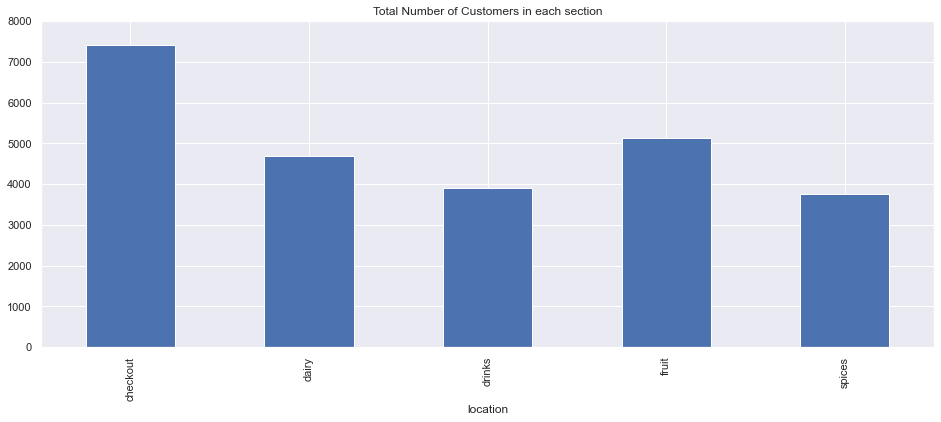

In [ ]:
l["cus_id"].count().plot.bar()
plt.rcParams['figure.figsize'] = (16,6)

plt.title('Total Number of Customers in each section')
plt.ylim(0, 8000)

In [ ]:
#Total number of the visits from the customers by department
loc2 = df.groupby(['location'])[['cus_id']].count().reset_index()
loc2
#1: Total number of visits in each section
#locx = df.groupby(['location'])[['customer_no']].count().reset_index()
#locx

,location,cus_id
0,checkout,7417
1,dairy,4679
2,drinks,3905
3,fruit,5122
4,spices,3754


In [ ]:
#2 : Calculate the total number of customers in each section over time
loct= df.groupby(['location', 'day'])[['cus_id']].nunique().reset_index()
loct


,location,day,cus_id
0,checkout,friday,1502
1,checkout,monday,1437
2,checkout,thursday,1532
3,checkout,tuesday,1420
4,checkout,wednesday,1526
5,dairy,friday,761
6,dairy,monday,720
7,dairy,thursday,782
8,dairy,tuesday,751
9,dairy,wednesday,804


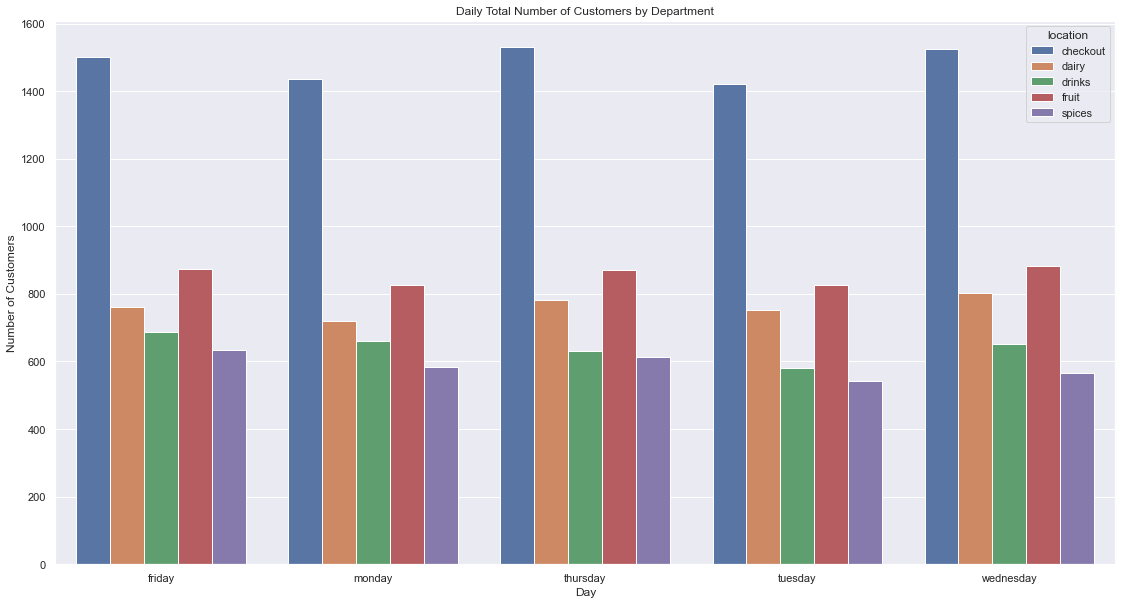

In [ ]:
#Visualisation: the total number of customers in each section over time
plt.figure(figsize=(19,10))
sns.barplot(data =loct, x='day', y ='cus_id', hue='location')
plt.xlabel('Day')
plt.ylabel('Number of Customers')
plt.title('Daily Total Number of Customers by Department')
#plt.ylim(6, 14)
plt.show()

In [ ]:
# Total number of customers in each section over time
#df['hour'] = df['timestamp'].apply(lambda x: x.hour)
loc_h = df.groupby(['location','hour'])[['cus_id']].count().reset_index()
loc_h.head()

,location,hour,cus_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342


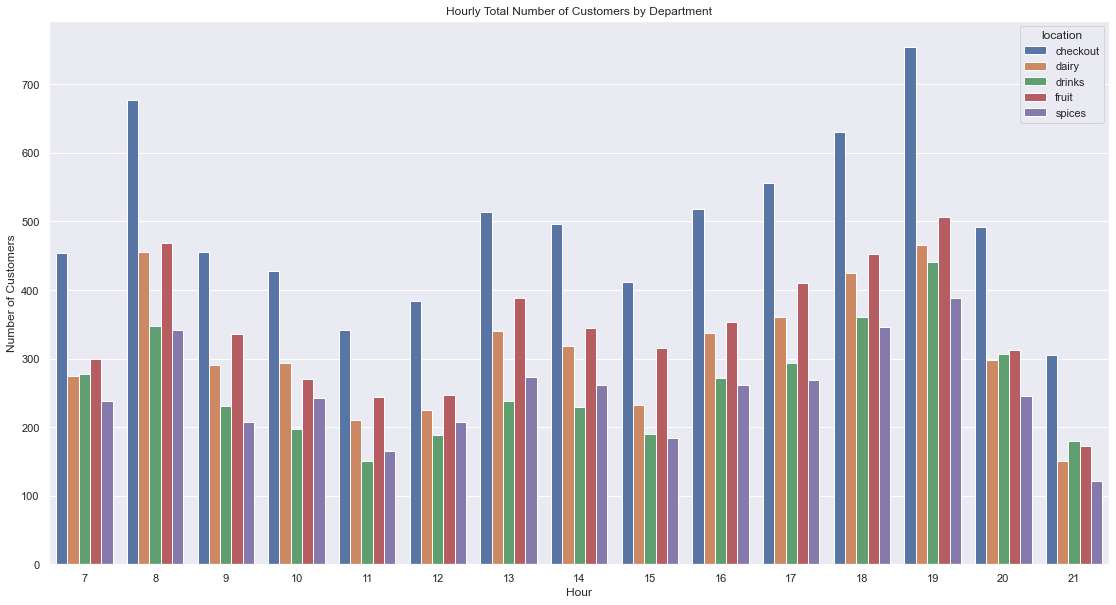

In [ ]:
plt.figure(figsize=(19,10))
sns.barplot(data =loc_h, x = 'hour', y ='cus_id', hue='location')
plt.xlabel('Hour')
plt.ylabel('Number of Customers')
plt.title('Hourly Total Number of Customers by Department')
#plt.ylim(6, 14)
plt.show()

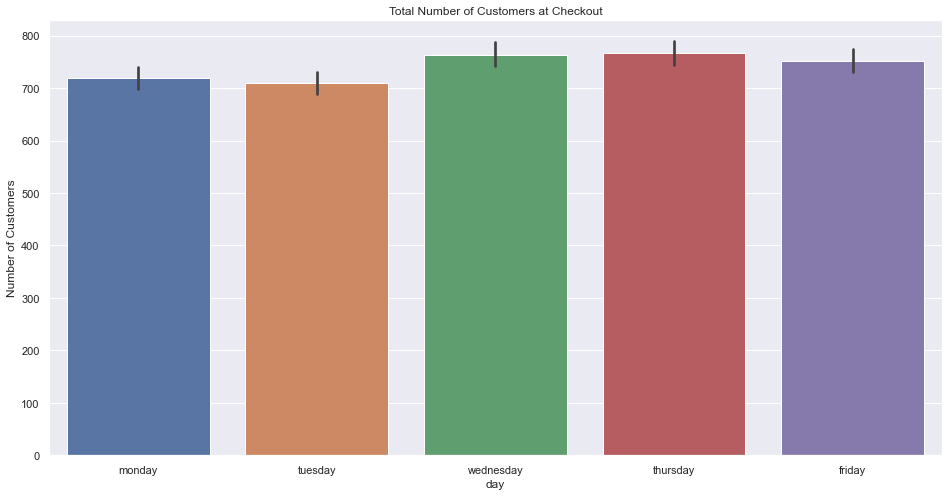

In [ ]:
#Display the number of customers at checkout over time
plt.figure(figsize=(16,8))
sns.barplot(data =df.loc[df['location']=='checkout'], x='day', y ='customer_no')
plt.xlabel('day')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers at Checkout')
#plt.ylim(6, 14)
plt.show()

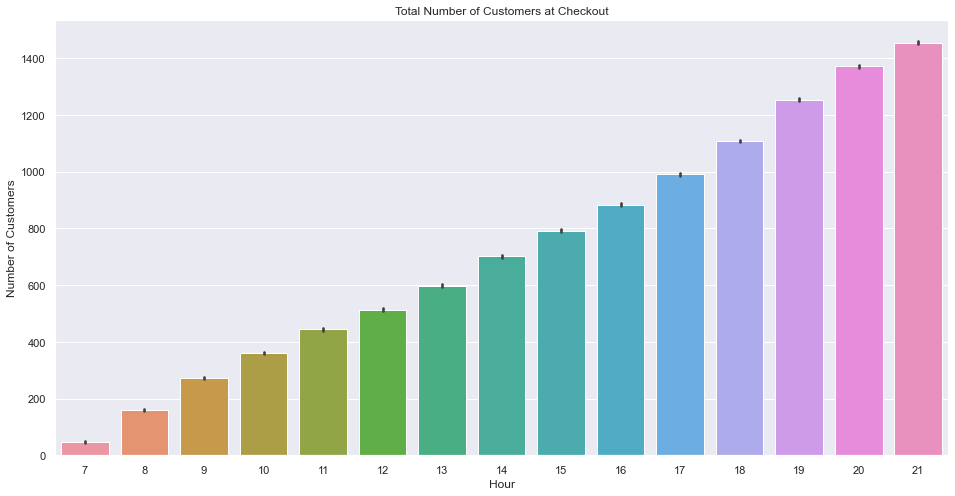

In [389]:
plt.figure(figsize=(16,8))
sns.barplot(data =df.loc[df['location']=='checkout'], x='hour', y ='customer_no')
plt.xlabel('Hour')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers at Checkout')
#plt.ylim(6, 14)
plt.show()

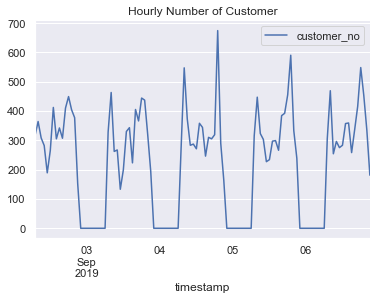

In [392]:
df.resample('H')[['customer_no']].count().plot(
    title = 'Hourly Number of Customer')
sns.despine()


In [370]:
df['a']=df[['customer_no']].index.max-df[['customer_no']].index.min

TypeError: unsupported operand type(s) for -: 'method' and 'method'

In [349]:
df

,customer_no,location,cus_id,day,hour,min,tot_cus
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3,895
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3,895
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4,895
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4,895
2019-09-02 07:04:00,5,spices,M-5,monday,7,4,750
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50,932
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50,1502
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50,1502


In [289]:

df['tot_cus']=df.groupby(["location", "day"])["cus_id"].transform("count")

In [ ]:
#Calculate the time each customer spent in the market


In [350]:
#BONUS: Create the revenues per min for each department
df.loc[df['location'] == 'fruit', 'revenue'] = 4
df.loc[df['location'] == 'spices', 'revenue'] = 3
df.loc[df['location'] =='dairy', 'revenue'] =5
df.loc[df['location'] == 'drinks', 'revenue'] =6

In [351]:
#Estimate the total revenue for a customer 
df['tot_rev']=df.groupby(["cus_id"])["revenue"].transform("sum")

In [377]:
cus_loc=df.groupby(["cus_id", "location"])

In [378]:
df[df['cus_id']=='M-30']

,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev,timestep
timestamp,,,,,,,,,,
2019-09-02 07:17:00,30,spices,M-30,monday,7,17,750,3.0,22.0,66
2019-09-02 07:18:00,30,drinks,M-30,monday,7,18,797,6.0,22.0,74
2019-09-02 07:19:00,30,fruit,M-30,monday,7,19,1005,4.0,22.0,81
2019-09-02 07:20:00,30,dairy,M-30,monday,7,20,895,5.0,22.0,86
2019-09-02 07:21:00,30,fruit,M-30,monday,7,21,1005,4.0,22.0,90
2019-09-02 07:23:00,30,checkout,M-30,monday,7,23,1437,NaN,22.0,98


In [381]:
#time spent in market by customers
loc_m = df.groupby(['location','min'])[['cus_id']].count().reset_index()
loc_m.head()
#df["datetime"].max() - df["datetime"].min()

,location,min,cus_id
0,checkout,0,116
1,checkout,1,111
2,checkout,2,122
3,checkout,3,124
4,checkout,4,109


In [355]:
df

,customer_no,location,cus_id,day,hour,min,tot_cus,revenue,tot_rev,timestep
timestamp,,,,,,,,,,
2019-09-02 07:03:00,1,dairy,M-1,monday,7,3,895,5.0,5.0,0
2019-09-02 07:03:00,2,dairy,M-2,monday,7,3,895,5.0,5.0,1
2019-09-02 07:04:00,3,dairy,M-3,monday,7,4,895,5.0,5.0,2
2019-09-02 07:04:00,4,dairy,M-4,monday,7,4,895,5.0,5.0,3
2019-09-02 07:04:00,5,spices,M-5,monday,7,4,750,3.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,F-1500,friday,21,50,932,5.0,17.0,24872
2019-09-06 21:50:00,1507,checkout,F-1507,friday,21,50,1502,NaN,5.0,24873
2019-09-06 21:50:00,1508,checkout,F-1508,friday,21,50,1502,NaN,5.0,24874


In [ ]:
L_d= df_m.groupby(["location", "day"])

In [ ]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np 

In [ ]:
loc_daily = df.groupby(['location','hour'])[['cus_id']].count().reset_index()
loc_daily

In [ ]:
plt.figure(figsize=(19,10))
sns.barplot(data =location_daily, x = 'day', y ='customer_no', hue='location')
plt.xlabel('Day')
plt.title('Daily Total Number of Customers')
#plt.ylim(6, 14)
plt.show()

In [ ]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df.groupby(['location'])['day'].value_counts().plot(kind='bar', color=my_colors)
plt.figure(figsize=(15,8))
plt.title('Total Number of Customers by day and department')


In [ ]:
df['tot_cus'].resample('D').mean().plot(kind='bar', color='green')
plt.figure(figsize=(15,8))
plt.title('Average Daily Customer')


In [ ]:
#L_h = df_m.groupby(["location", "hour"]) 

In [ ]:
#Time each customer spent in market


In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='hour', y='tot_cus')

plt.xticks(rotation=50)
plt.ylabel('Number of Customers')
plt.xlabel('Hour')

plt.title('Number of Customers by Section and Day')

plt.show()


In [ ]:
df['tot_cus'].plot(color='green')

In [ ]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df, x=df.Datetimeindex, y ='tot_cus', label='Number of Customer')
plt.xlabel('Date')
plt.title('Total Number of Customer by time')
#plt.ylim(-10, 30)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
l["customer_no"].count().plot(x='hour', kind='kde', ax=plt.gca())

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(df_m =df_m.count('customer_no'), x = 'hour', y ='customer_no', label='Number of Customer')
plt.ylabel('Number of Customer')
plt.xlabel('Hour')
plt.title('The total number of customers in each section over time')
plt.ylim(-10, 30)
plt.show()

In [398]:
#cus name
from faker import Faker


ModuleNotFoundError: No module named 'faker'